In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Clasificador_imagenes/dogs-vs-cats (1)/test1.zip'
extract_path = '/content/test/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verifica el contenido descomprimido
print(os.listdir(extract_path))

['test1']


In [ ]:
zip_path = '/content/drive/MyDrive/Clasificador_imagenes/dogs-vs-cats (1)/train.zip'
extract_path = '/content/train/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verifica el contenido descomprimido
print(os.listdir(extract_path))

['train']


In [ ]:
#import os libs
import os
import shutil
import itertools
import random
import pathlib
from PIL import Image
#import Data handling
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
#import Deep learning tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , BatchNormalization , Dropout,Flatten , Activation
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cambia 'ruta_a_la_carpeta' por la ruta de tu carpeta
ruta_carpeta = '/content/train1/train/cats'

# Lista de archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Número de archivos
numero_archivos = len(archivos)

print(f"Hay {numero_archivos} archivos en la carpeta.")

Hay 10000 archivos en la carpeta.


In [ ]:

ruta_base = '/content'
ruta_train_inicial = os.path.join(ruta_base, 'train/train')
ruta_train_destino = os.path.join(ruta_base, 'train1/train')
ruta_validation_destino = os.path.join(ruta_base, 'train1/validation')
ruta_test_destino = os.path.join(ruta_base, 'train1/test')

# Crear las carpetas si no existen
for subdir in ['train1/train/cats', 'train1/train/dogs', 'train1/validation/cats', 'train1/validation/dogs', 'train1/test/cats', 'train1/test/dogs']:
    os.makedirs(os.path.join(ruta_base, subdir), exist_ok=True)

# Listar todas las imágenes
imagenes_gatos = [f for f in os.listdir(ruta_train_inicial) if 'cat' in f]
imagenes_perros = [f for f in os.listdir(ruta_train_inicial) if 'dog' in f]

# Mezclar aleatoriamente las listas
random.shuffle(imagenes_gatos)
random.shuffle(imagenes_perros)

# Definir el número de imágenes para cada conjunto
num_train = 10000
num_validation = 1250
num_test = 1250

# Función para mover imágenes
def mover_imagenes(imagenes, tipo, num_train, num_validation, num_test):
    for i, imagen in enumerate(imagenes):
        src = os.path.join(ruta_train_inicial, imagen)
        if i < num_train:
            dst = os.path.join(ruta_train_destino, tipo, imagen)
        elif i < num_train + num_validation:
            dst = os.path.join(ruta_validation_destino, tipo, imagen)
        elif i < num_train + num_validation + num_test:
            dst = os.path.join(ruta_test_destino, tipo, imagen)
        else:
            break
        shutil.move(src, dst)

# Mover las imágenes
mover_imagenes(imagenes_gatos, 'cats', num_train, num_validation, num_test)
mover_imagenes(imagenes_perros, 'dogs', num_train, num_validation, num_test)

print("Las imágenes han sido organizadas correctamente.")

Las imágenes han sido organizadas correctamente.


In [ ]:
ruta_train_vacia = os.path.join('/content', 'train')

# Función para verificar si una carpeta está vacía
def carpeta_esta_vacia(carpeta):
    return not any(os.scandir(carpeta))

# Eliminar la carpeta 'train' si está vacía
def eliminar_carpeta_si_esta_vacia(carpeta):
    if carpeta_esta_vacia(carpeta):
        shutil.rmtree(carpeta)
        print(f"La carpeta {carpeta} ha sido eliminada.")
    else:
        print(f"La carpeta {carpeta} no está vacía.")

# Verificar y eliminar las subcarpetas si están vacías
for root, dirs, files in os.walk(ruta_train_vacia, topdown=False):
    for name in dirs:
        subcarpeta = os.path.join(root, name)
        eliminar_carpeta_si_esta_vacia(subcarpeta)

# Verificar y eliminar la carpeta 'train' si está vacía después de eliminar las subcarpetas
eliminar_carpeta_si_esta_vacia(ruta_train_vacia)

La carpeta /content/train/train ha sido eliminada.
La carpeta /content/train ha sido eliminada.


In [ ]:
# Ruta a las carpetas existentes
ruta_base = '/content'
ruta_train = os.path.join(ruta_base, 'train')
ruta_validation = os.path.join(ruta_base, 'validation')

# Nueva ruta para la carpeta 'train1'
ruta_train1 = os.path.join(ruta_base, 'train1')

# Crear la nueva carpeta 'train1' si no existe
os.makedirs(ruta_train1, exist_ok=True)

# Función para mover carpetas
def mover_carpeta(src, dst):
    shutil.move(src, dst)

# Mover las carpetas 'train' y 'validation' a 'train1'
mover_carpeta(ruta_train, ruta_train1)
mover_carpeta(ruta_validation, ruta_train1)

print("Las carpetas han sido movidas correctamente.")

Las carpetas han sido movidas correctamente.


In [ ]:
# Ruta a las carpetas base
ruta_base = '/content/train1'
ruta_train = os.path.join(ruta_base, 'train')
ruta_validation = os.path.join(ruta_base, 'validation')
ruta_test = os.path.join(ruta_base, 'test')

# Función para contar imágenes en una subcarpeta
def contar_imagenes(carpeta, tipo):
    ruta_carpeta = os.path.join(carpeta, tipo)
    return len([f for f in os.listdir(ruta_carpeta) if os.path.isfile(os.path.join(ruta_carpeta, f))])

# Contar imágenes en cada subcarpeta
def contar_imagenes_en_carpetas():
    carpetas = {'train': ruta_train, 'validation': ruta_validation, 'test': ruta_test}
    tipos = ['cats', 'dogs']

    for nombre_carpeta, ruta_carpeta in carpetas.items():
        print(f"En la carpeta {nombre_carpeta}:")
        for tipo in tipos:
            cantidad = contar_imagenes(ruta_carpeta, tipo)
            print(f"  {tipo}: {cantidad} imágenes")

# Ejecutar la función
contar_imagenes_en_carpetas()

En la carpeta train:
  cats: 10000 imágenes
  dogs: 10000 imágenes
En la carpeta validation:
  cats: 1250 imágenes
  dogs: 1250 imágenes
En la carpeta test:
  cats: 1250 imágenes
  dogs: 1250 imágenes


In [ ]:
# Definir las rutas a las carpetas de entrenamiento, validación y prueba
base_dir = '/content/train1'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Parámetros de generación de imágenes
img_size = (224, 224)
batch_size = 32
img_shape = (img_size[0], img_size[1], 3)

# Generadores de imágenes
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_directory(train_dir, target_size=img_size, class_mode='binary',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)

valid_gen = ts_gen.flow_from_directory(valid_dir, target_size=img_size, class_mode='binary',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)

test_gen = ts_gen.flow_from_directory(test_dir, target_size=img_size, class_mode='binary',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


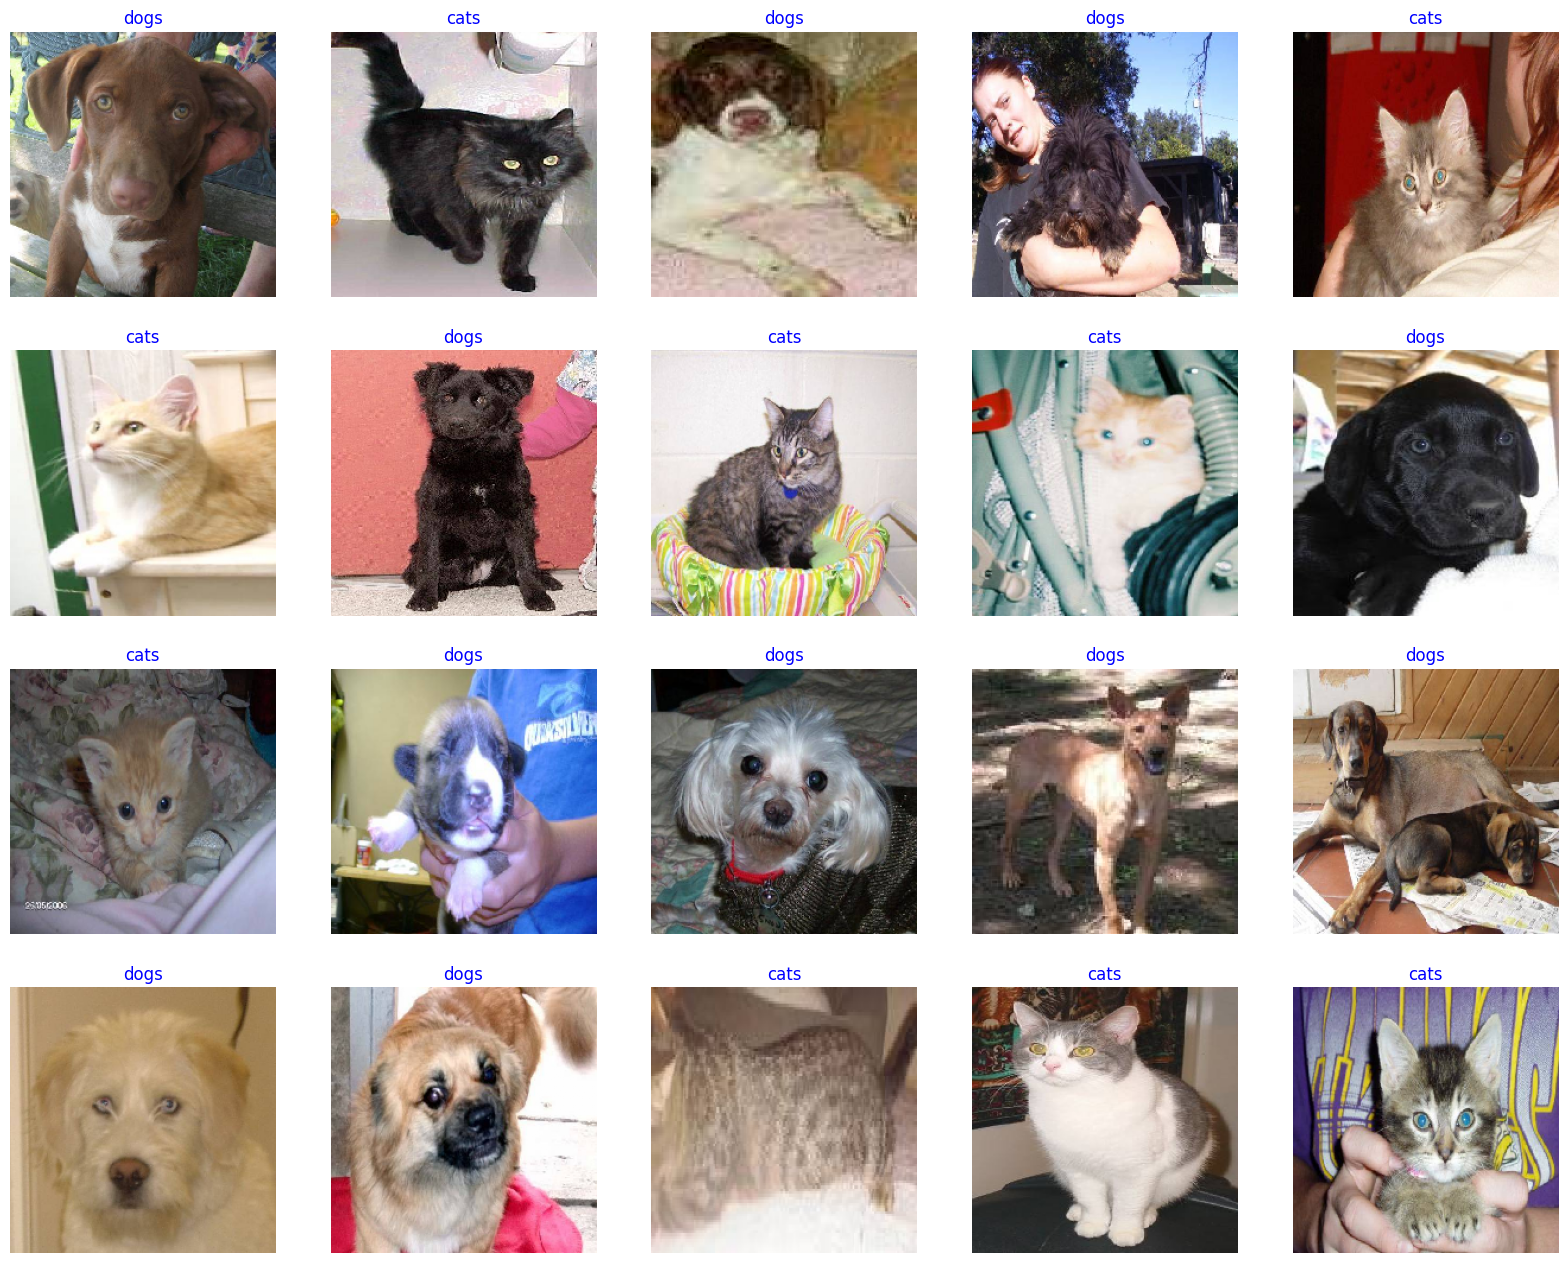

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)
num_samples = len(images)

plt.figure(figsize=(20, 20))

for i in range(min(20, num_samples)):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    class_index = int(labels[i])
    class_name = classes[class_index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
plt.show()

In [ ]:
img_shape = (img_size[0] , img_size[1] , 3)
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False , weights= 'imagenet' ,
                                                               input_shape= img_shape,pooling= 'max')
base_model.trainable= False

num_classes = len(classes)

model = Sequential([
    base_model,
    BatchNormalization(axis = -1 , momentum = 0.99 , epsilon = 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate = 0.4 , seed = 40),
    Dense(1 , activation= 'sigmoid' )
])
model.compile(Adamax(learning_rate = 0.001) , loss = 'binary_crossentropy' , metrics= ['accuracy'])
model.summary()

115263384/115263384 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                       

In [ ]:
history = model.fit(x= train_gen , validation_data= valid_gen , epochs= 10 , verbose = 1 , validation_steps = None , shuffle = False)

Epoch 1/10
625/625 [==============================] - 1886s 3s/step - loss: 1.8627 - accuracy: 0.9818 - val_loss: 0.3901 - val_accuracy: 0.9860
Epoch 2/10
625/625 [==============================] - 1832s 3s/step - loss: 0.2572 - accuracy: 0.9863 - val_loss: 0.1729 - val_accuracy: 0.9872
Epoch 3/10
625/625 [==============================] - 1832s 3s/step - loss: 0.1686 - accuracy: 0.9857 - val_loss: 0.1383 - val_accuracy: 0.9864
Epoch 4/10
625/625 [==============================] - 1835s 3s/step - loss: 0.1432 - accuracy: 0.9873 - val_loss: 0.1272 - val_accuracy: 0.9868
Epoch 5/10
625/625 [==============================] - 1838s 3s/step - loss: 0.1336 - accuracy: 0.9874 - val_loss: 0.1200 - val_accuracy: 0.9868
Epoch 6/10
625/625 [==============================] - 1856s 3s/step - loss: 0.1269 - accuracy: 0.9879 - val_loss: 0.1126 - val_accuracy: 0.9848
Epoch 7/10
625/625 [==============================] - 1843s 3s/step - loss: 0.1218 - accuracy: 0.9882 - val_loss: 0.1074 - val_accuracy:

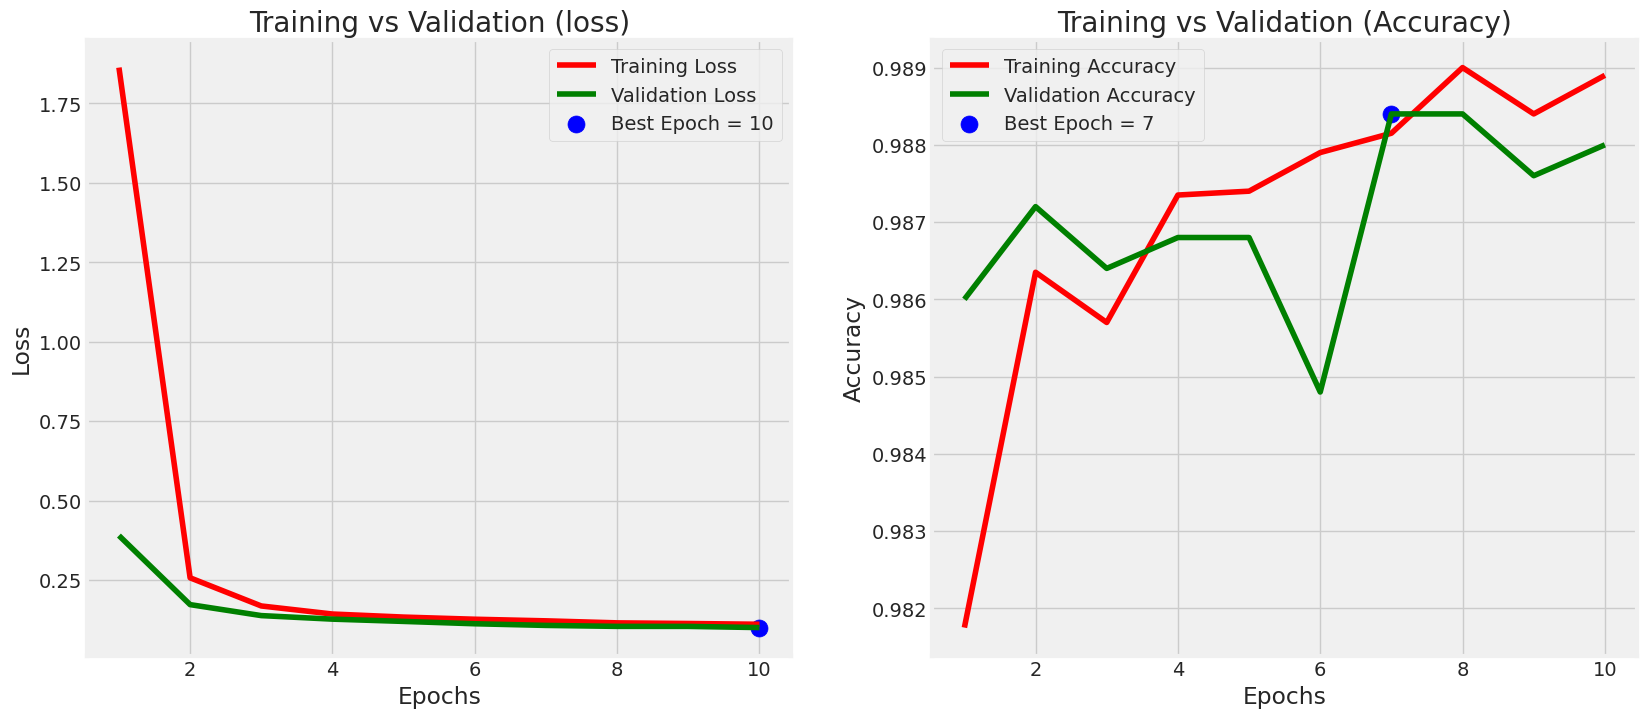

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show();

In [ ]:
train_score = model.evaluate(train_gen , steps= 32 , verbose = 1)
val_score = model.evaluate(valid_gen , steps = 32 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 32 , verbose = 1)

print(f'Train loss = {train_score[0] }')
print(f'Train Accuracy = {train_score[1]}')
print(f'Validation loss = {val_score[0]}')
print(f'Validation Accuracy = {val_score[1]}')
print(f'Test loss = {test_score[0]}')
print(f'Test Accuracy = {test_score[1]}')

32/32 [==============================] - 82s 3s/step - loss: 0.0937 - accuracy: 0.9922
Train loss = 0.0906987190246582
Train Accuracy = 0.9931640625
Validation loss = 0.09994272887706757
Validation Accuracy = 0.98828125
Test loss = 0.09367520362138748
Test Accuracy = 0.9921875


In [ ]:
# Haces prediciones en test
preds = model.predict(test_gen)

# convertir predicciones en  (0 or 1)
predicted_classes = (preds > 0.5).astype(int)

79/79 [==============================] - 214s 3s/step


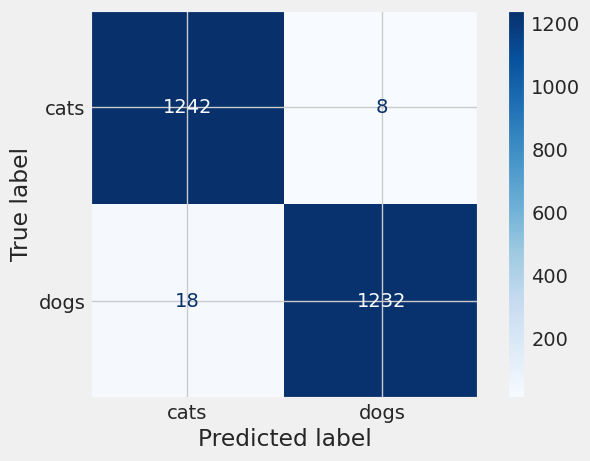

In [ ]:
# Obtener las etiquetas verdaderas del generador
true_classes = test_gen.classes

# calcular la  confusion matrix
confusion = confusion_matrix(true_classes, predicted_classes)

# mostrar la confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=test_gen.class_indices)
disp.plot(cmap='Blues', values_format='d');

In [ ]:
classification_rep = classification_report(true_classes, predicted_classes, target_names=test_gen.class_indices)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

        cats       0.99      0.99      0.99      1250
        dogs       0.99      0.99      0.99      1250

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



Probamos con la carpeta test que tenemos


Found 20 images belonging to 1 classes.
20/20 [==============================] - 2s 121ms/step


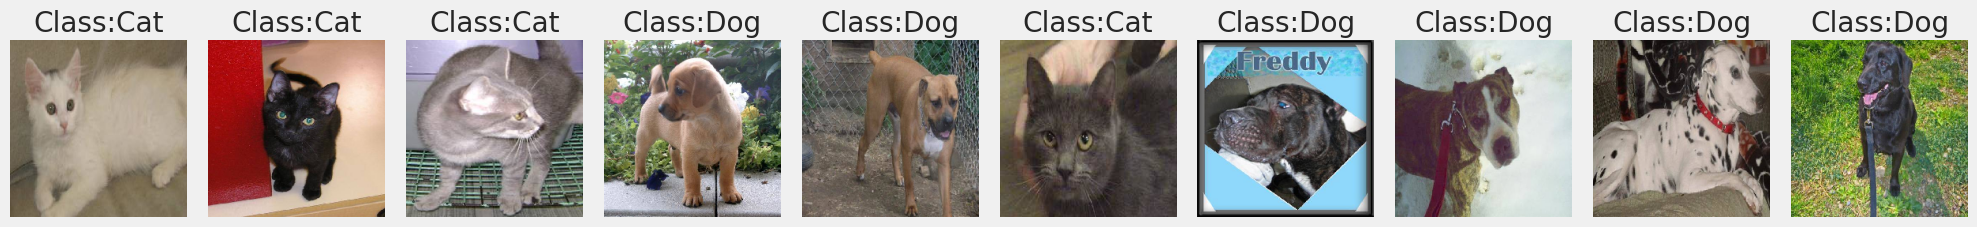

In [ ]:
# Definir la ruta a la carpeta de imágenes aleatorias y crear una carpeta temporal
ruta_imgs = '/content/test/test1'
ruta_imgs_temp = '/content/imgs_temp'

# Crear la carpeta temporal si no existe
if not os.path.exists(ruta_imgs_temp):
    os.makedirs(ruta_imgs_temp)

# Seleccionar aleatoriamente 20 imágenes de la carpeta 'imgs'
imagenes = os.listdir(ruta_imgs)
imagenes_seleccionadas = random.sample(imagenes, 20)

# Copiar las imágenes seleccionadas a la carpeta temporal
for img in imagenes_seleccionadas:
    src_path = os.path.join(ruta_imgs, img)
    dst_path = os.path.join(ruta_imgs_temp, img)
    shutil.copy(src_path, dst_path)

# Crear un generador de datos para las imágenes seleccionadas
img_gen = ImageDataGenerator()
imgs_gen = img_gen.flow_from_directory(
    '/content',
    classes=['imgs_temp'],
    target_size=img_size,
    class_mode=None,
    color_mode='rgb',
    shuffle=False,
    batch_size=1
)

# Predecir las clases de las imágenes seleccionadas
predicciones = model.predict(imgs_gen)

# Mostrar las imágenes junto con sus predicciones
def mostrar_imagenes_con_predicciones(generator, predictions, num_imagenes=10):
    fig, axes = plt.subplots(1, num_imagenes, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, pred in zip(generator, axes, predictions):
        ax.imshow(img[0].astype('uint8'))
        label = 'Dog' if pred > 0.5 else 'Cat'
        ax.set_title(f'Class:{label}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar las primeras 10 imágenes con sus predicciones
mostrar_imagenes_con_predicciones(imgs_gen, predicciones[:20])

# Limpiar la carpeta temporal
shutil.rmtree(ruta_imgs_temp)

In [ ]:


# Guardar el modelo
model.save('/content/drive/MyDrive/Clasificador_imagenes/mi_modelo.h5')